NameError: name 'sns' is not defined

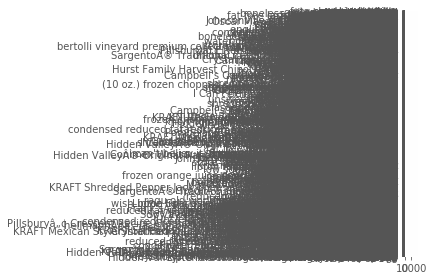

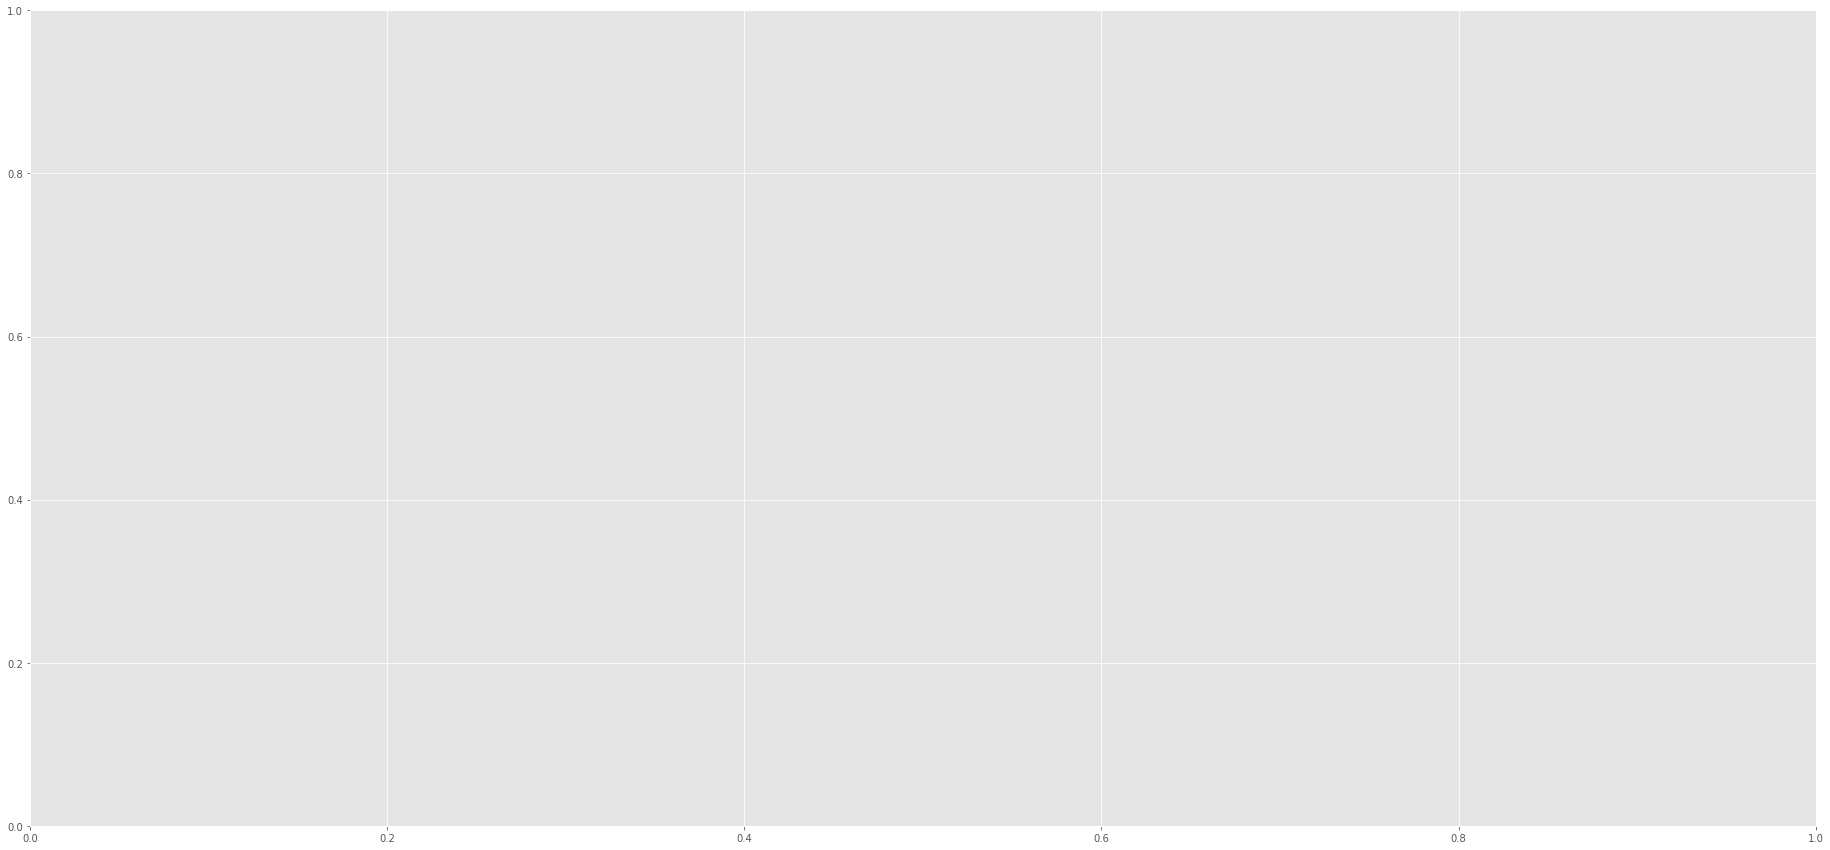

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set_context('talk')

# Plot Style
plt.style.use(u'ggplot')

# Read in training Data File
# Fields are cuisine, id, ingredients
train = pd.read_json("C:/Users/chloe/Desktop/3B/MSCI436Project/train.json")

# Find Cuisine Distribution
cuisine_distribution = Counter(train.cuisine)

# Plot Cuisine Distribution
cuisine_fig = pd.DataFrame(cuisine_distribution, index=[0]).transpose()[0].plot(kind='barh')
cuisine_fig.invert_yaxis()
cuisine_fig = cuisine_fig.get_figure()
cuisine_fig.tight_layout()
cuisine_fig.savefig("Cuisine_Distribution.jpg")

# Find Ingredient Distribution
recipe_ingredient = [Counter(recipe) for recipe in train.ingredients]
ingredient_distribution = sum(recipe_ingredient, Counter())

# Plot Ingredient Distribution
ingredient_fig = pd.DataFrame(ingredient_distribution, index=[0]).transpose()[0].plot(kind='barh')
ingredient_fig.invert_yaxis()
ingredient_fig = ingredient_fig.get_figure()
ingredient_fig.tight_layout()
ingredient_fig.savefig("Ingredient_Distribution.jpg")





In [15]:
#Least Common Ingredients

ingredients_individual = Counter([ingredient for ingredient_list in train.ingredients for ingredient in ingredient_list])
ingredients_individual = pd.DataFrame.from_dict(ingredients_individual,orient='index').reset_index()
ingredients_individual = ingredients_individual.rename(columns={'index':'Ingredient', 0:'Count'})
ingredients_individual.sort_values('Count', ascending = False)['Count'].describe()
ingredients_individual.sort_values('Count', ascending=True).head(20)


,Ingredient,Count
6713,crushed cheese crackers,1
5194,mora chiles,1
5195,double smoked bacon,1
5198,Mazola Canola Oil,1
5201,seasoned croutons,1
1757,turkey hot dogs,1
5202,avocado dressing,1
5203,light kidney beans,1
5205,white bread slices,1
1747,fiber one,1


NameError: name 'sns' is not defined

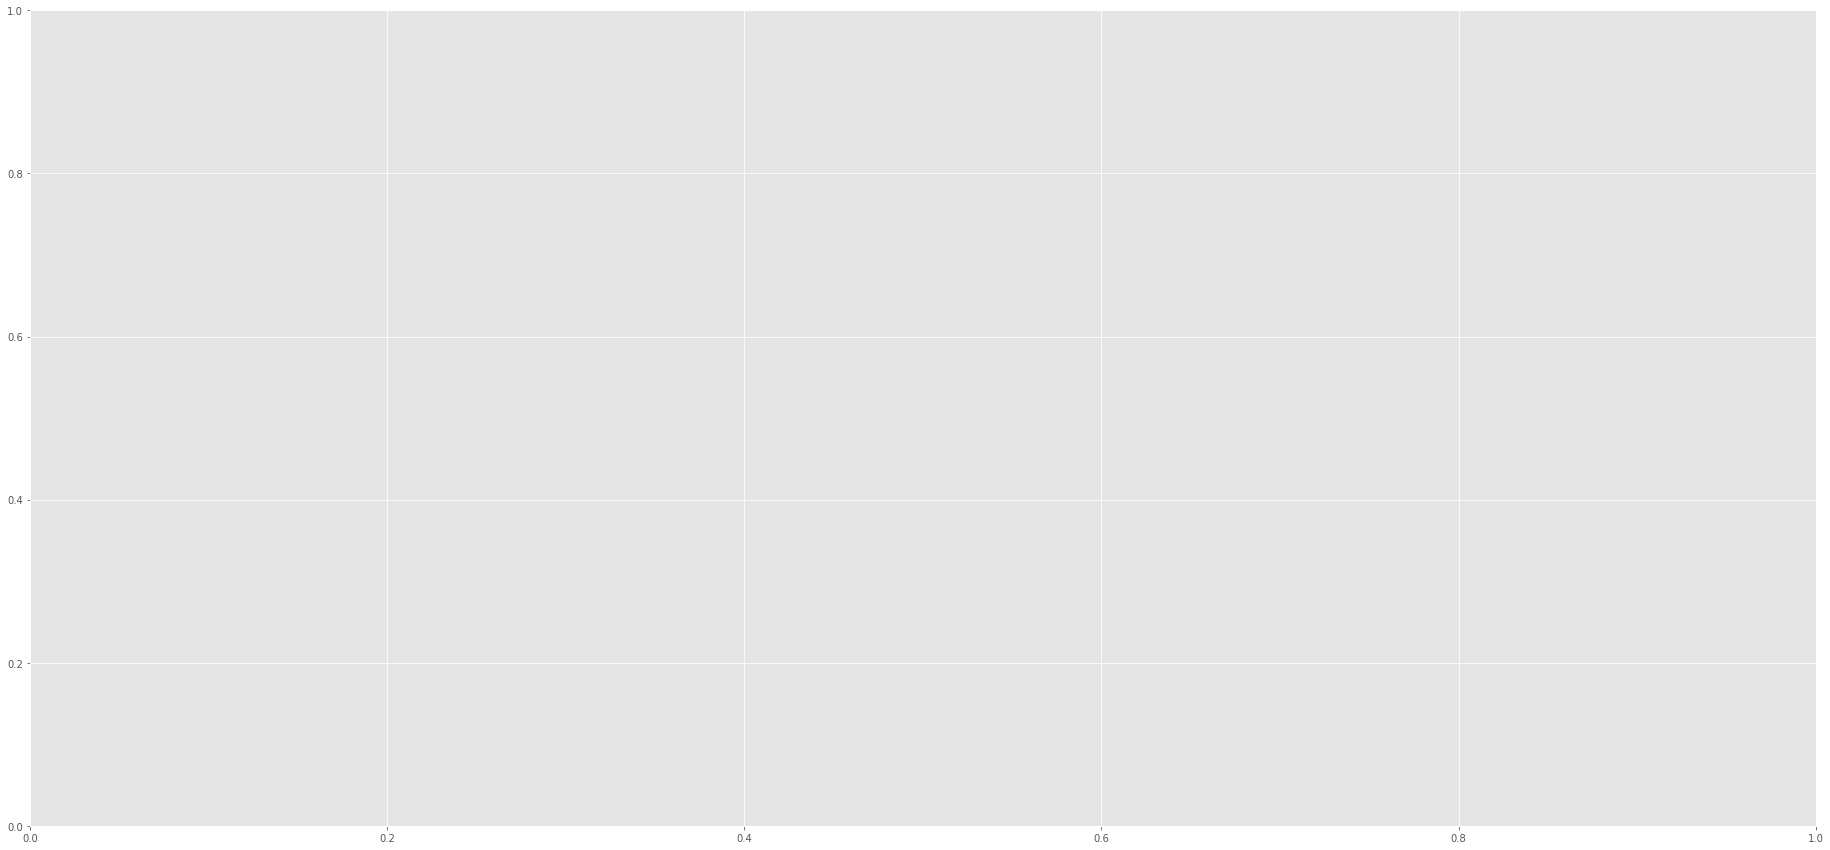

In [17]:
#Plot Ingredient Count

f, ax = plt.subplots(figsize=(32,15))
sns.boxplot(x='cuisine',
            y='number_ingredients',
            data= (pd.concat([train.cuisine,train.ingredients.map(lambda l: len(l))], axis=1)
                    .rename(columns={'ingredients':'number_ingredients'}))
            )

